## Final Project - Data Science Analysis: Redwine Reviews

In [5]:
import pandas as pd 
import math
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [6]:
#had to search error not reading file
#https://stackoverflow.com/questions/18171739/unicodedecodeerror-when-reading-csv-file-in-pandas-with-python
df = pd.read_csv('data/redwinereview.csv', encoding = "ISO-8859-1", engine='python')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8666 entries, 0 to 8665
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             8666 non-null   object 
 1   Country          8666 non-null   object 
 2   Region           8666 non-null   object 
 3   Winery           8666 non-null   object 
 4   Rating           8666 non-null   float64
 5   NumberOfRatings  8666 non-null   int64  
 6   Price            8666 non-null   float64
 7   Year             8666 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 541.8+ KB


# BASE DATAFRAME SUMMARY METRICS

In [7]:
df.describe()

,Rating,NumberOfRatings,Price
count,8666.000000,8666.000000,8666.000000
mean,3.890342,415.287445,39.145065
std,0.308548,899.726373,84.936307
min,2.500000,25.000000,3.550000
25%,3.700000,66.000000,10.680000
50%,3.900000,157.000000,18.200000
75%,4.100000,401.000000,38.142500
max,4.800000,20293.000000,3410.790000


# CREATE NEW COLUMNS: 
1.RATING GROUPING, 2.PRICE GROUPING, 3.WINERY-WINE NAME CONCATENATE, 4.EXTRACT CABERNET, MERLOT, & RIOJA FROM NAME, 5.WINE NAME WITHOUT YEAR

In [8]:
#add new columns
#use to round up to no decimals
def round_up(n, decimals=0): 
    multiplier = 10 ** decimals 
    return math.ceil(n * multiplier) / multiplier

df['RatingGroup'] =  df['Rating'].apply(round_up)
df['PriceGroup'] =  df['Price'].apply(round_up)

In [9]:
df['WineName'] = df['Name'].str[:-5]

In [10]:
#https://www.geeksforgeeks.org/python-pandas-series-str-cat-to-concatenate-string/
#use concatenate for winery wine name key
def concatstr (winery, winename):
    return str(winery) + '-' + str(winename) 

df['WineryWine'] = df[['Winery','WineName']].apply(lambda row: concatstr(row['Winery'], row['WineName']), axis=1)

In [11]:
df['PriceGroup2'] = df['Price'].round(-1)

In [12]:
#https://stackoverflow.com/questions/59270560/pandas-looping-through-a-list-of-strings-in-a-column-create-a-new-column-with
winetypes = ['merlot','cabernet','rioja']
df['WineType'] = df['WineName'].str.lower().str.extract(f'({"|".join(winetypes)})')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8666 entries, 0 to 8665
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             8666 non-null   object 
 1   Country          8666 non-null   object 
 2   Region           8666 non-null   object 
 3   Winery           8666 non-null   object 
 4   Rating           8666 non-null   float64
 5   NumberOfRatings  8666 non-null   int64  
 6   Price            8666 non-null   float64
 7   Year             8666 non-null   object 
 8   RatingGroup      8666 non-null   float64
 9   PriceGroup       8666 non-null   float64
 10  WineName         8666 non-null   object 
 11  WineryWine       8666 non-null   object 
 12  PriceGroup2      8666 non-null   float64
 13  WineType         1049 non-null   object 
dtypes: float64(5), int64(1), object(8)
memory usage: 948.0+ KB


In [14]:
df.head(5)

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,RatingGroup,PriceGroup,WineName,WineryWine,PriceGroup2,WineType
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011,5.0,95.0,Pomerol,Château La Providence-Pomerol,100.0,NaN
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017,5.0,16.0,Lirac,Château Mont-Redon-Lirac,20.0,NaN
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015,4.0,8.0,Erta e China Rosso di Toscana,Renzo Masi-Erta e China Rosso di Toscana,10.0,NaN
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019,4.0,9.0,Bardolino,Cavalchina-Bardolino,10.0,NaN
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016,4.0,30.0,Ried Scheibner Pinot Noir,Markowitsch-Ried Scheibner Pinot Noir,30.0,NaN


# WORD CLOUD BASED ON WINE NAME

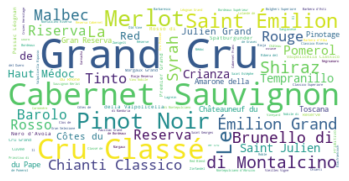

In [15]:
text = " ".join(review for review in df.WineName)
wordcloud = WordCloud(background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Create a new data set for the years 2015, 2016, 2017, and 2018 for comparable number of ratings.

In [16]:
#test count of records per year
df['Year'].value_counts().head(5)

2016    1776
2017    1558
2015    1396
2018    1099
2014     798
Name: Year, dtype: int64

In [17]:
##https://pandas.pydata.org/docs
df2 = df[df["Year"].isin(['2015', '2016', '2017', '2018'])]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5829 entries, 1 to 8665
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             5829 non-null   object 
 1   Country          5829 non-null   object 
 2   Region           5829 non-null   object 
 3   Winery           5829 non-null   object 
 4   Rating           5829 non-null   float64
 5   NumberOfRatings  5829 non-null   int64  
 6   Price            5829 non-null   float64
 7   Year             5829 non-null   object 
 8   RatingGroup      5829 non-null   float64
 9   PriceGroup       5829 non-null   float64
 10  WineName         5829 non-null   object 
 11  WineryWine       5829 non-null   object 
 12  PriceGroup2      5829 non-null   float64
 13  WineType         786 non-null    object 
dtypes: float64(5), int64(1), object(8)
memory usage: 683.1+ KB


# UPDATED SUMMARY METRICS

In [18]:
#https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html
df2[['Price', 'Rating','NumberOfRatings']].describe()

,Price,Rating,NumberOfRatings
count,5829.000000,5829.000000,5829.000000
mean,25.577006,3.840470,400.567336
std,41.478306,0.291866,869.514386
min,3.550000,2.500000,25.000000
25%,9.500000,3.600000,63.000000
50%,14.790000,3.800000,148.000000
75%,26.220000,4.000000,374.000000
max,960.170000,4.800000,19489.000000


*Avg rating decreased 0.4, avg number of ratings decreased 15, avg price decreased 25, and max price decreased 960.*

# SUMMARY METRICS OVER TIME

In [19]:
df2[['Year','Price', 'Rating','NumberOfRatings']].groupby('Year').mean()


,Price,Rating,NumberOfRatings
Year,,,
2015,35.867722,3.929513,426.881089
2016,31.324679,3.888851,413.796171
2017,20.604955,3.809820,393.004493
2018,10.265587,3.692630,356.485896


In [20]:
#https://jamesrledoux.com/code/group-by-aggregate-pandas
year = df2.groupby(['Year']).agg({'Rating': ['count','mean', 'min', 'max'],'Price': ['mean', 'min', 'max']})
year.head(5)

Rating                          Price              
      count      mean  min  max       mean   min     max
Year                                                    
2015   1396  3.929513  2.6  4.8  35.867722  4.16  730.12
2016   1776  3.888851  2.5  4.8  31.324679  3.95  960.17
2017   1558  3.809820  2.8  4.7  20.604955  4.30  633.62
2018   1099  3.692630  2.5  4.4  10.265587  3.55   87.90

*Rating, Price, and # of ratings decreased from 2015 to 2018*

# FREQUENCY OF RATING

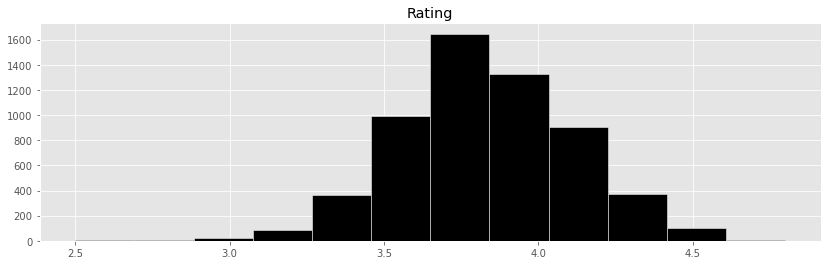

In [29]:
#df2['Rating'].value_counts(ascending=True).plot(kind='barh', color="blue")
df2.hist('Rating', figsize=(14,4), bins=12, color="black", edgecolor='white')
plt.show()

TEST FOR OUTLIERS

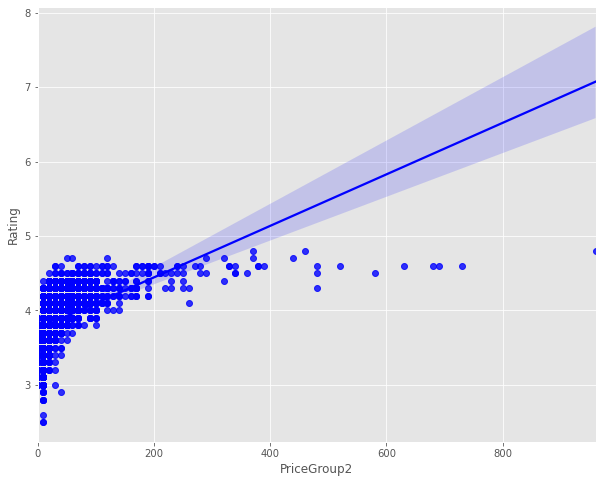

In [30]:
#test for rating change over price
#source: referenced GA class/lab solutions
plt.rc('figure', figsize=(10,8))
plt.style.use('ggplot')
sns.regplot(x='PriceGroup2', y='Rating', color="blue", data=df2)
plt.show()

# LIMIT DATA:
1. Under $50, 2. winetypes=cabernet, merlot, or rioja, 3. 30 or more ratings

In [32]:
#need to adjust for outliers
#source: referenced GA class/lab solutions
under50 = df2['Price'].between(5, 51)
winetype = df2['WineName'].str.lower().str.contains(r'cabernet|merlot|rioja')
rate30 = df2['NumberOfRatings'] > 29

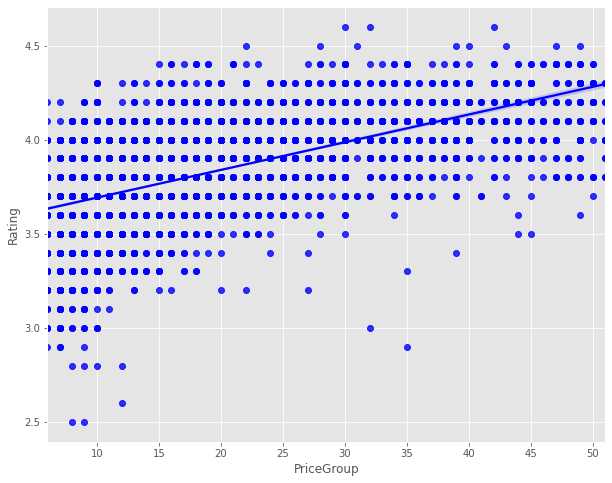

In [33]:
#Finding: ratings increase as prices increase
sns.regplot(x='PriceGroup', y='Rating', color="blue", data=df2[under50])
plt.show()

*Plot shows ratings increase as prices increase, limited to wines under 50.*

# Create a new data set using the above masks

In [34]:
#create new data set for wines under $50, for types=cabernet, merlot, and rioja, and had at least 30 ratings.
df3 = df2[under50 & winetype & rate30]
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 707 entries, 18 to 8665
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             707 non-null    object 
 1   Country          707 non-null    object 
 2   Region           707 non-null    object 
 3   Winery           707 non-null    object 
 4   Rating           707 non-null    float64
 5   NumberOfRatings  707 non-null    int64  
 6   Price            707 non-null    float64
 7   Year             707 non-null    object 
 8   RatingGroup      707 non-null    float64
 9   PriceGroup       707 non-null    float64
 10  WineName         707 non-null    object 
 11  WineryWine       707 non-null    object 
 12  PriceGroup2      707 non-null    float64
 13  WineType         707 non-null    object 
dtypes: float64(5), int64(1), object(8)
memory usage: 82.9+ KB


# Updated Summary Metrics

In [35]:
#check n size for new dataframe
df3[['Price', 'Rating','NumberOfRatings']].describe()
#df3[['Year','Rating']].groupby('Year').count()

,Price,Rating,NumberOfRatings
count,707.000000,707.000000,707.000000
mean,13.213083,3.691796,638.490806
std,7.583657,0.271687,1305.987642
min,5.160000,2.500000,30.000000
25%,7.890000,3.500000,88.500000
50%,10.950000,3.700000,218.000000
75%,15.775000,3.900000,558.500000
max,48.550000,4.400000,12778.000000


*Avg rating increased 0.2, avg number of ratings increased , avg price decreased, and max price is 48.*

# Top 5-10 wines under 50 with at least 30 ratings

In [36]:
#What are the top 5 rated wines with at least 30 ratings? 
df3[['WineryWine', 'PriceGroup2', 'Rating','NumberOfRatings']].groupby('WineryWine').mean().sort_values('Rating', ascending=False).head(10)

,PriceGroup2,Rating,NumberOfRatings
WineryWine,,,
Bodegas Roda-Roda I Reserva Rioja,50.0,4.4,138.0
Roveglia-Cà d'Oro Garda Cabernet Sauvignon,20.0,4.4,44.0
Lan-A Mano Rioja,30.0,4.3,466.0
El Enemigo-Cabernet Franc,20.0,4.3,2604.0
The Prisoner-Thorn Merlot,50.0,4.3,363.0
Kanonkop-Cabernet Sauvignon,30.0,4.3,339.0
Hensel-Höhenflug Merlot,20.0,4.3,82.0
Brutalis-Alicante Bouschet - Cabernet Sauvignon,30.0,4.2,429.0
Black Stallion-Cabernet Sauvignon,30.0,4.2,5217.0


In [37]:
#https://jamesrledoux.com/code/group-by-aggregate-pandas
yeardf3 = df3.groupby(['Year']).agg({'Rating': ['count','mean', 'min', 'max'],'Price': ['mean', 'min', 'max']})
yeardf3.head(5)

Rating                          Price             
      count      mean  min  max       mean   min    max
Year                                                   
2015    144  3.770833  3.0  4.4  16.218681  5.95  46.50
2016    203  3.730049  2.5  4.3  15.569163  5.31  48.55
2017    201  3.695522  2.9  4.2  12.556468  5.72  47.99
2018    159  3.566667  2.5  4.2   8.313019  5.16  24.50

*2015 is more promising in terms of rating and a higher avg price.  2018 has the lowest rating and lowest price across all measures.  2016 appears comparable to 2015.*

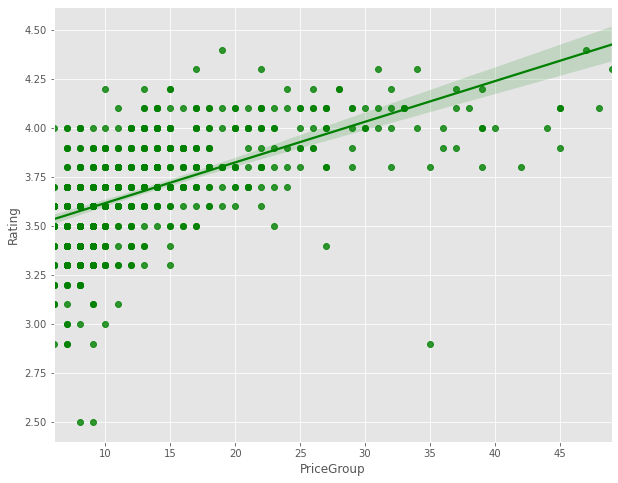

In [38]:
sns.regplot(x='PriceGroup', y='Rating', color="green", data=df3)
plt.show()

*Scatter continues to show as price increases ratings increase.*

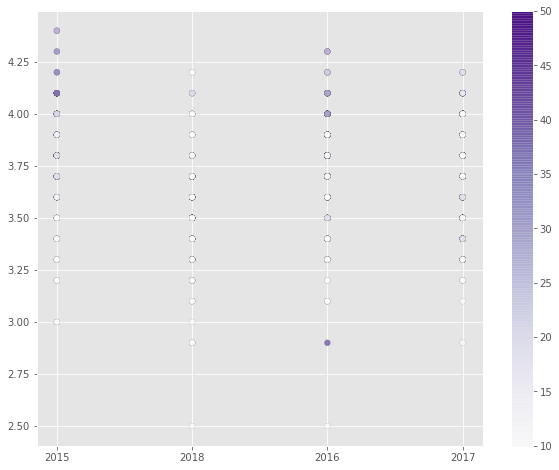

In [39]:
#DF3 test range of prices YOY
#source from GA class work
plt.scatter(x = 'Year',y = 'Rating', c='PriceGroup2', cmap='Purples', alpha=0.75, edgecolor='black', linewidth=0.1, data=df3)
cbar = plt.colorbar()
plt.show()

*Above shows another way to visualize 2015 has higher rating and higher prices compared to 2018.*

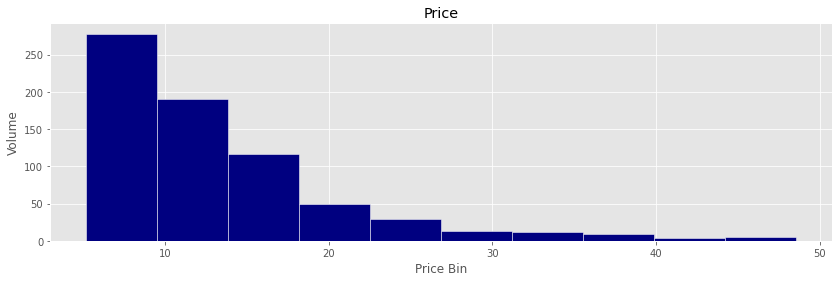

In [41]:
df3.hist('Price', figsize=(14,4), bins=10, color="navy", edgecolor='white')
plt.xlabel('Price Bin')
plt.ylabel('Volume')
plt.show()

*The majority of the under 50 group is made up of 20 dollars or less.*

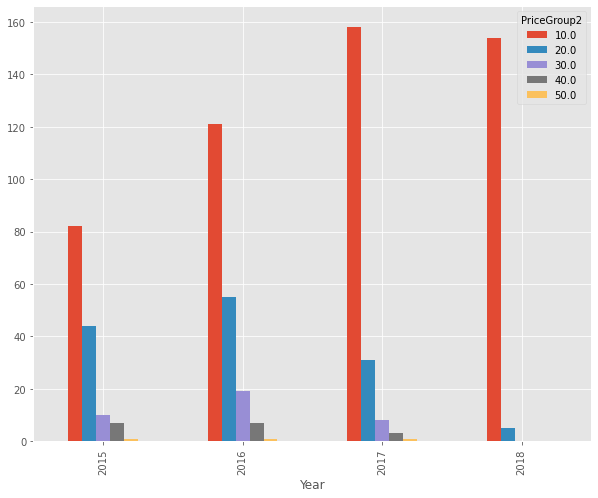

In [43]:
#vOL OF PRICEGRP YoY for df3
df3.groupby(['Year'])['PriceGroup2'].value_counts().unstack().plot.bar()
plt.show()

*Prices decrease over time moving more and more into the 10 dollar range.*

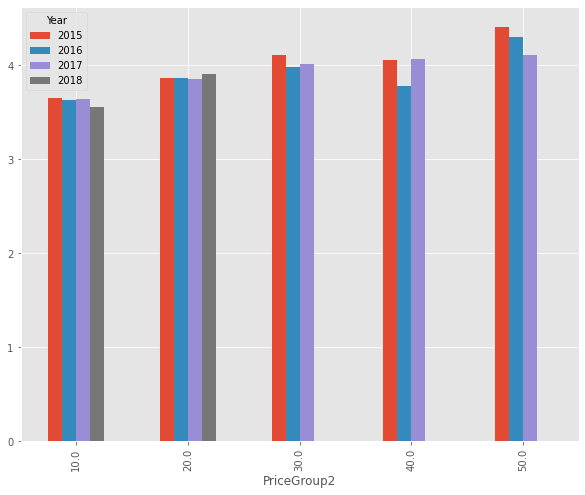

In [44]:
df3.groupby(['PriceGroup2', 'Year'])['Rating'].mean().unstack().plot.bar()
plt.show()

*Overall ratings are stable over time for each pricegroup until you get over 30.*

# Compare the three winetypes: Cabernet, Merlot, and Rioja.  Display the Top 5 of each.

In [46]:
df3[['WineType', 'Price', 'Rating','NumberOfRatings']].groupby('WineType').mean().sort_values('Rating', ascending=False)

,Price,Rating,NumberOfRatings
WineType,,,
rioja,14.779857,3.817143,1182.742857
cabernet,13.804988,3.698845,705.404157
merlot,11.419118,3.633824,309.710784


*Rioja higher price with highest avg rating.*

In [47]:
#CREATE THREE WINE CATEGORIES
cabernet = df3[df3['WineName'].str.lower().str.contains('cabernet')]
merlot = df3[df3['WineName'].str.lower().str.contains('merlot')]
rioja = df3[df3['WineName'].str.lower().str.contains('rioja')]

In [48]:
Top5merlot = merlot.groupby(['WineName']).agg({'Rating': 'mean', 'Price': 'mean'}).sort_values('Rating', ascending=False).head(5)
Top5merlot

,Rating,Price
WineName,,
Höhenflug Merlot,4.3,16.45
Thorn Merlot,4.3,48.55
Russiz Superiore Merlot Collio,4.2,23.99
Merlot Riserva Siebeneich,4.1,19.85
Ca' de' Rocchi Dugal Cabernet Sauvignon - Merlot,4.1,13.95


In [49]:
Top5cab = cabernet.groupby(['WineName']).agg({'Rating': 'mean', 'Price': 'mean'}).sort_values('Rating', ascending=False).head(5)
Top5cab

,Rating,Price
WineName,,
Cà d'Oro Garda Cabernet Sauvignon,4.4,18.5
Kith & Kin Cabernet Sauvignon,4.2,38.5
Alicante Bouschet - Cabernet Sauvignon,4.2,27.9
Allomi Cabernet Sauvignon,4.2,25.5
Special Cuvée Cabernet Sauvignon,4.1,18.9


In [50]:
Top5rio = rioja.groupby(['WineName']).agg({'Rating': 'mean', 'Price': 'mean'}).sort_values('Rating', ascending=False).head(5)
Top5rio

,Rating,Price
WineName,,
Roda I Reserva Rioja,4.4,46.50
A Mano Rioja,4.3,33.90
Finca Torrea Rioja,4.1,28.99
Finca Monasterio Rioja,4.1,21.39
Propiedad Rioja,4.1,26.61


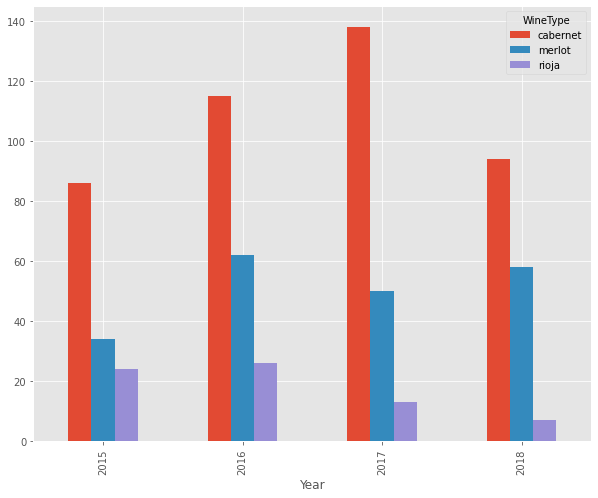

In [51]:
df3.groupby(['Year'])['WineType'].value_counts().unstack().plot.bar()
plt.show()

*Volume by Price overtime by winetype: similar YoY % of volume.*

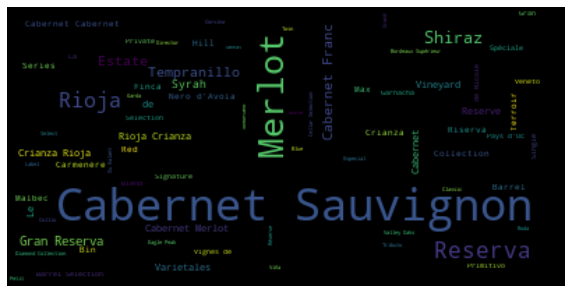

In [52]:
textdf3 = " ".join(review for review in df3.WineName)
wordcloud = WordCloud(background_color="black", contour_color="white", relative_scaling=.5).generate(textdf3)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

*Wordcloud for updated data frame.*

# Do ratings and price change for the winery/wine over time?  
Limit data to wines with 3 to 4 years to compare rating and price over time.

In [55]:
#NEW DATAFRAME TO LIMIT WINES WITH 3-4 YEARS
#https://stackoverflow.com/questions/29836836/how-do-i-filter-a-pandas-dataframe-based-on-value-counts
df4 = df3[df3['WineryWine'].map(df3['WineryWine'].value_counts()) > 2]
#df4.info()
wineyear = df4.groupby(['WineryWine', 'Year']).agg({'Rating': 'mean', 'Price': 'mean'}).sort_values(['WineryWine','Year'], ascending=True)
wineyear

Rating  Price
WineryWine                                        Year               
Andeluna-1300 Merlot                              2015    3.40   9.69
                                                  2016    3.30   7.70
                                                  2017    3.40   7.70
                                                  2018    3.40   9.90
Caliterra-Reserva Cabernet Sauvignon              2016    3.40   8.72
                                                  2017    3.30   6.09
                                                  2018    3.40   6.99
Caliterra-Tributo Cabernet Sauvignon              2015    3.70   9.64
                                                  2016    3.90  11.90
                                                  2017    3.80  13.82
Catena-Cabernet Sauvignon                         2015    4.00  13.55
                                                  2016    3.90  15.79
                                                  2017    4.00  13.25
Cederberg-Merlot - Shiraz                         2016    3.70  14.27
                                                  2017    3.90  12.90
                                                  2018    3.90  13.15
Enate-Cabernet Sauvignon - Merlot                 2015    3.60   9.50
                                                  2016    3.60   9.50
                                                  2017    3.60   9.50
Errazuriz-Estate Cabernet Sauvignon               2015    3.40   8.50
                                                  2016    3.50   8.28
                                                  2018    3.60   9.50
Fetzer-Eagle Peak Merlot                          2015    3.30  10.69
                                                  2016    3.50   8.90
                                                  2017    3.50   8.95
Fetzer-Valley Oaks Cabernet Sauvignon             2016    3.60  11.19
                                                  2017    3.60   8.80
                                                  2018    3.70   8.53
Los Vascos-Cabernet Sauvignon                     2016    3.40  11.50
                                                  2017    3.40  12.14
                                                  2018    3.60   9.40
Louis M. Martini-Cabernet Sauvignon               2015    3.80  17.75
                                                  2016    3.95  24.11
MAN-Cabernet Sauvignon (Ou Kalant)                2016    3.50   7.19
                                                  2017    3.50   5.95
                                                  2018    3.40   5.94
Montes Alpha-Merlot                               2015    3.80  16.09
                                                  2016    4.00  13.49
                                                  2017    3.90  13.50
Puklavec Family Wines-Cabernet Sauvignon - Merlot 2015    3.00   7.65
                                                  2016    3.40   7.66
                                                  2017    3.30   8.95
Ramón Bilbao-Crianza Rioja                        2015    3.80   8.95
                                                  2016    3.90   8.60
                                                  2017    3.90   8.70
Rust En Vrede-Estate Vineyards Cabernet Sauvignon 2016    4.00  28.09
                                                  2017    4.10  22.50
                                                  2018    4.00  21.99
Santa Rita-120 Cabernet Sauvignon                 2015    3.20   6.77
                                                  2017    3.40   7.80
                                                  2018    3.50   6.33

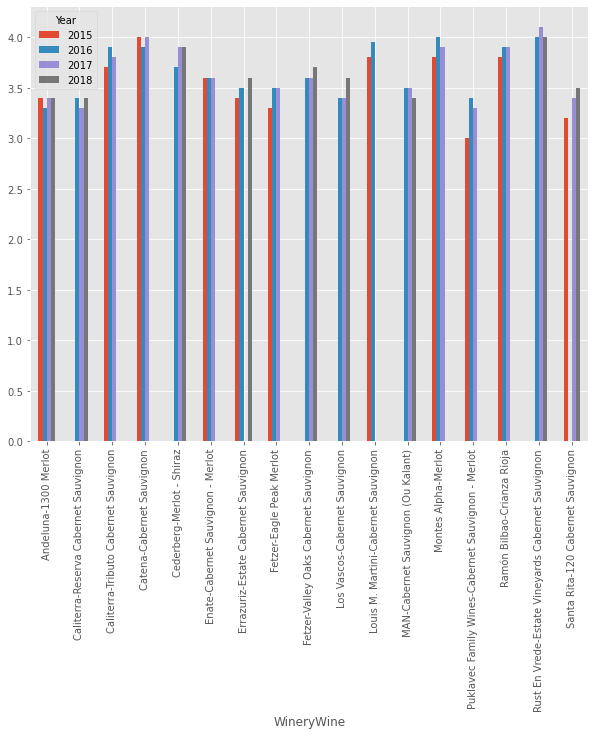

In [56]:
#DO RATINGS CHANGE YOY
df4.groupby(['WineryWine', 'Year'])['Rating'].mean().unstack().plot.bar()
plt.show()

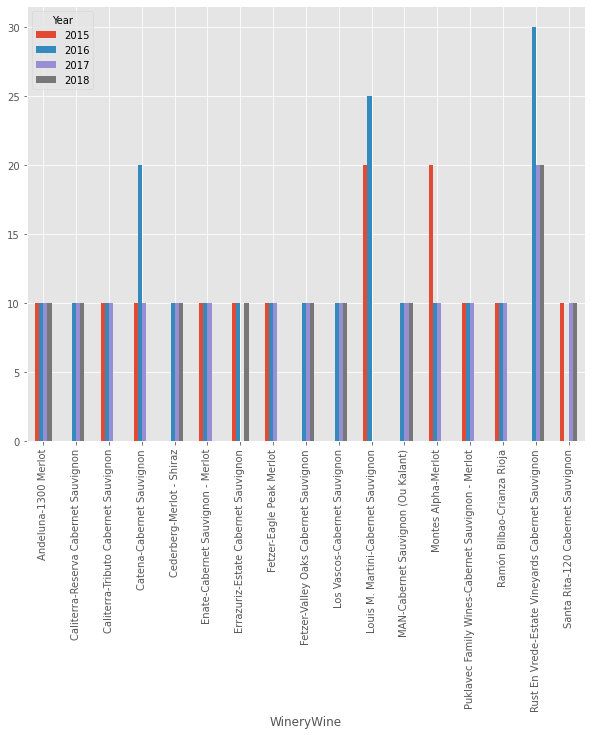

In [57]:
#DO PRICES CHANGE YOY
df4.groupby(['WineryWine', 'Year'])['PriceGroup2'].mean().unstack().plot.bar()
plt.show()

*Overall no substantial change in rating for each winery/wine.  Prices fluctuated in some cases.  It appears more drastic due to price rounding in some cases.*
*Note: Louis M Martini changed more drastically b/c of same year different region in 2016.  Same region price did not change.*
*Note 2: Rust En Vrede price dropped by $6, no change in region.*

# COUNTRY ANALYSIS

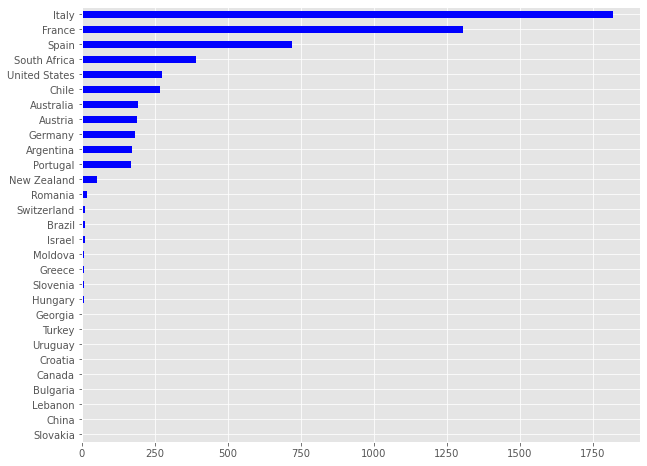

In [59]:
df2['Country'].value_counts(ascending=True).plot(kind='barh', color="blue")
plt.show()

Top 10 Rated Countries

In [84]:
#DF2 - TOP 10 RATED COUNTRIES
df2[['Country', 'Price', 'Rating']].groupby('Country').mean().sort_values('Rating', ascending=False).head(10)

,Price,Rating
Country,,
Moldova,28.855000,4.162500
Georgia,21.526000,4.140000
Croatia,21.400000,4.100000
Greece,20.721429,3.985714
United States,42.106934,3.914599
Italy,22.685387,3.870346
Portugal,16.364790,3.867066
France,37.262874,3.866897
Lebanon,15.120000,3.850000


Average Price per Country YoY

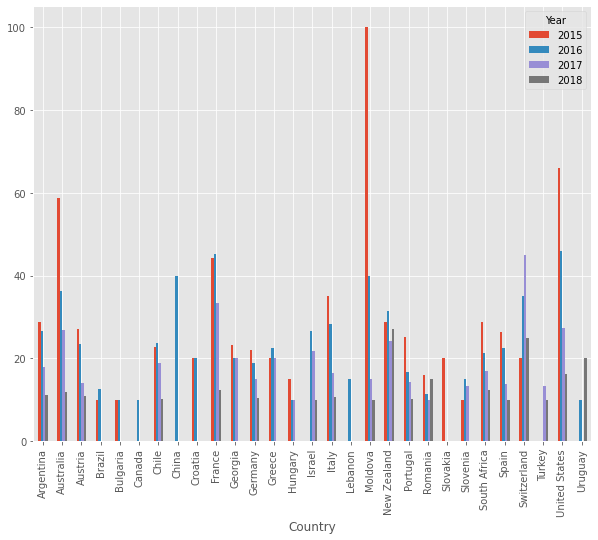

In [68]:
#DF2 - Avg price YoY
df2.groupby(['Country', 'Year'])['PriceGroup2'].mean().unstack().plot.bar()
plt.show()

*Shows some fluctuation YoY especially 2015 to 2018.*

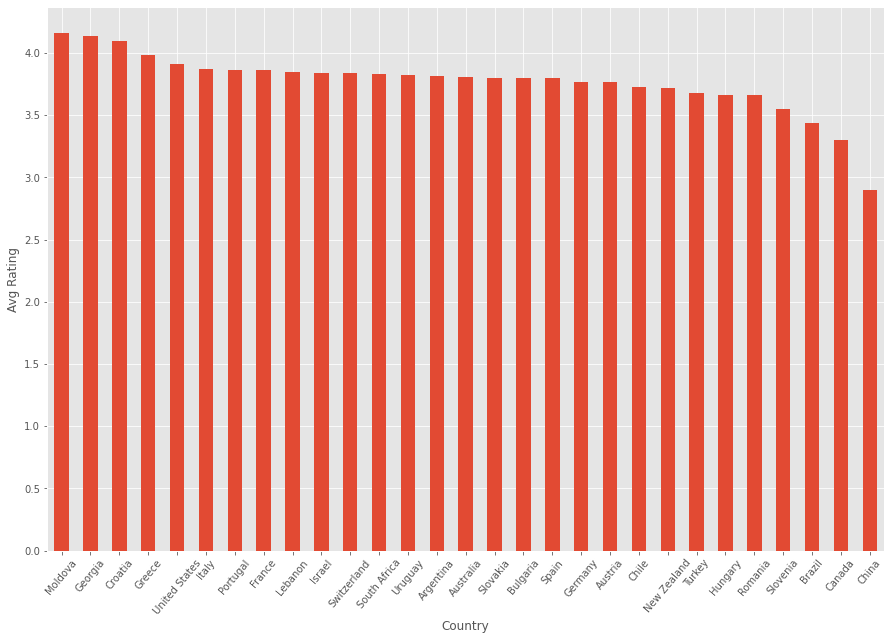

In [69]:
country = df2.groupby('Country')
plt.figure(figsize=(15,10))
country.mean().sort_values('Rating',ascending=False)['Rating'].plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Country")
plt.ylabel("Avg Rating")
plt.show()

*Another way to visualize average rating by Country.*

# Compare subset of countries YoY

In [70]:
#NEW DF FOR SUBSET OF COUNTRIES off of DF2 limited to just 2015-2018
df5 = df2[df2["Country"].isin(['Germany', 'United States', 'Italy', 'Portugal', 'France', 'Spain', 'Austria'])]
#df5.info()

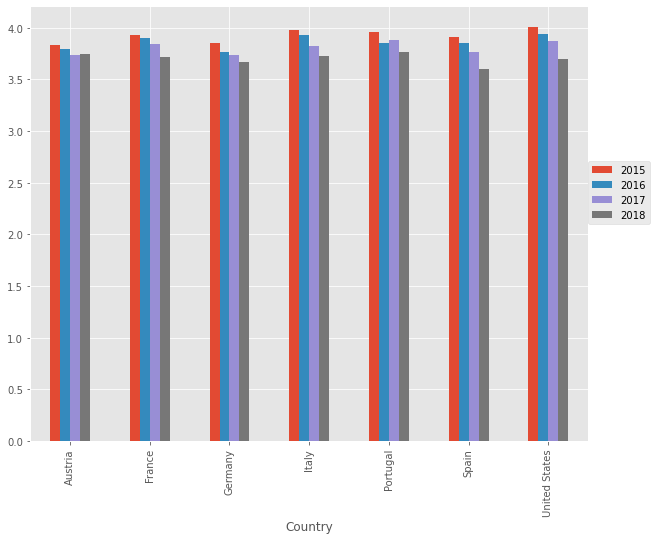

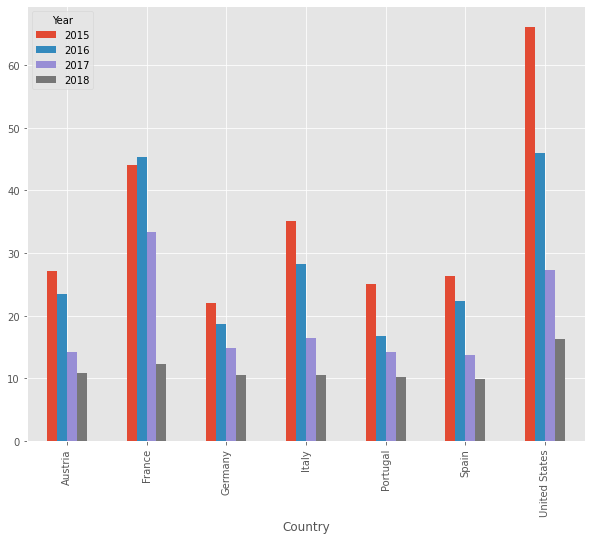

In [87]:
#AVERAGE RATING & Price Group YOY BY COUNTRY
df5.groupby(['Country', 'Year'])['Rating'].mean().unstack().plot.bar()
plt.legend(loc=(1, 0.50))
df5.groupby(['Country', 'Year'])['PriceGroup2'].mean().unstack().plot.bar()

plt.show()

# What are the top 10 wines for the countries above?
-Analyze over time.

In [72]:
#Top wines limited to above countries
countrywine = df5.groupby(['Country', 'WineName','Year']).agg({'Rating': 'mean', 'Price': 'mean'}).sort_values(['Rating'], ascending=False)
#countrywine = df5.groupby(['Country', 'WineName','Year']).agg({'Rating': 'mean', 'Price': 'mean'}).sort_values(['Country'], ascending=False)
countrywine.head(10)

Rating  \
Country       WineName                                           Year           
United States Beckstoffer Las Piedras Vineyard Cabernet Sauvi... 2015     4.8   
              CASK 23 Cabernet Sauvignon                         2016     4.7   
Italy         Tenuta Guado al Tasso Bolgheri Superiore           2017     4.7   
United States Beckstoffer Dr. Crane Vineyard Cabernet Sauvignon  2015     4.7   
Italy         Since 1974 Primitivo di Manduria Limited Platin... 2016     4.7   
United States Bucephalus Red Blend                               2015     4.7   
Italy         Sperss Barolo                                      2015     4.6   
France        Pauillac (Premier Grand Cru Classé)                2017     4.6   
              Pessac-Léognan (Premier Grand Cru Classé)          2016     4.6   
              Hommage à Jacques Perrin Châteauneuf-du-Pape       2016     4.6   

                                                                        Price  
Country       WineName                                           Year          
United States Beckstoffer Las Piedras Vineyard Cabernet Sauvi... 2015  368.47  
              CASK 23 Cabernet Sauvignon                         2016  320.00  
Italy         Tenuta Guado al Tasso Bolgheri Superiore           2017  125.00  
United States Beckstoffer Dr. Crane Vineyard Cabernet Sauvignon  2015  367.00  
Italy         Since 1974 Primitivo di Manduria Limited Platin... 2016   53.35  
United States Bucephalus Red Blend                               2015  286.15  
Italy         Sperss Barolo                                      2015  252.10  
France        Pauillac (Premier Grand Cru Classé)                2017  633.62  
              Pessac-Léognan (Premier Grand Cru Classé)          2016  677.48  
              Hommage à Jacques Perrin Châteauneuf-du-Pape       2016  515.00

In [73]:
countrywine.query('Year == "2015" and Country == "United States"').head(5)
#countrywine.query('Year == "2016" and Country == "United States"').head(5)
#countrywine.query('Year == "2017" and Country == "United States"').head(5)
#countrywine.query('Year == "2018" and Country == "United States"').head(5)

Rating  \
Country       WineName                                           Year           
United States Beckstoffer Las Piedras Vineyard Cabernet Sauvi... 2015     4.8   
              Beckstoffer Dr. Crane Vineyard Cabernet Sauvignon  2015     4.7   
              Bucephalus Red Blend                               2015     4.7   
              Hillside Select Cabernet Sauvignon                 2015     4.6   
              Opus One                                           2015     4.6   

                                                                        Price  
Country       WineName                                           Year          
United States Beckstoffer Las Piedras Vineyard Cabernet Sauvi... 2015  368.47  
              Beckstoffer Dr. Crane Vineyard Cabernet Sauvignon  2015  367.00  
              Bucephalus Red Blend                               2015  286.15  
              Hillside Select Cabernet Sauvignon                 2015  378.98  
              Opus One                                           2015  377.33

In [74]:
countrywine.query('Year == "2015" and Country == "Austria"').head(5)
#countrywine.query('Year == "2016" and Country == "Austria"').head(5)
#countrywine.query('Year == "2017" and Country == "Austria"').head(5)
#countrywine.query('Year == "2018" and Country == "Austria"').head(5)

Rating  Price
Country WineName                 Year               
Austria Steinzeiler              2015     4.4  58.80
        Salzberg                 2015     4.3  82.50
        Hochberc (Blaufränkisch) 2015     4.3  39.87
        Massiv                   2015     4.3  34.00
        In Signo Leonis          2015     4.2  35.09

In [75]:
countrywine.query('Year == "2015" and Country == "France"').head(5)
#countrywine.query('Year == "2016" and Country == "France"').head(5)
#countrywine.query('Year == "2017" and Country == "France"').head(5)
#countrywine.query('Year == "2018" and Country == "France"').head(5)

Rating   Price
Country WineName                                     Year                
France  La Porte du Ciel Languedoc La Clape          2015     4.6  116.00
        Pauillac (Premier Grand Cru Classé)          2015     4.6  689.95
        Clos d'Ora                                   2015     4.5  229.00
        Hommage à Jacques Perrin Châteauneuf-du-Pape 2015     4.5  341.18
        Volnay Santenots-Du-Milieu Premier Cru       2015     4.4  139.00

In [76]:
countrywine.query('Year == "2015" and Country == "Germany"').head(5)
#countrywine.query('Year == "2016" and Country == "Germany"').head(5)
#countrywine.query('Year == "2017" and Country == "Germany"').head(5)
#countrywine.query('Year == "2018" and Country == "Germany"').head(5)

Rating  Price
Country WineName                                       Year               
Germany Kirschgarten Spatburgunder GG                  2015     4.4  39.00
        Jaspis Syrah                                   2015     4.4  57.70
        Suis-Je Gentille Ainsi Pinot Noir              2015     4.2  38.01
        Dry Aged                                       2015     4.2  33.14
        Vorderer Winklerberg Ihringen Spätburgunder GG 2015     4.1  50.00

In [77]:
countrywine.query('Year == "2015" and Country == "Italy"').head(5)
#countrywine.query('Year == "2016" and Country == "Italy"').head(5)
#countrywine.query('Year == "2017" and Country == "Italy"').head(5)
#countrywine.query('Year == "2018" and Country == "Italy"').head(5)

Rating   Price
Country WineName                             Year                
Italy   Sperss Barolo                        2015     4.6  252.10
        Redigaffi Toscana                    2015     4.6  208.55
        Barolo Bricco Rocche                 2015     4.6  184.23
        Sassicaia                            2015     4.6  279.00
        Amore e Magia Brunello di Montalcino 2015     4.6   90.20

In [78]:
countrywine.query('Year == "2015" and Country == "Portugal"').head(5)
#countrywine.query('Year == "2016" and Country == "Portugal"').head(5)
#countrywine.query('Year == "2017" and Country == "Portugal"').head(5)
#countrywine.query('Year == "2018" and Country == "Portugal"').head(5)

Rating   Price
Country  WineName                        Year                
Portugal Amma Red                        2015     4.6  116.00
         Curriculum Vitae Douro (CV)     2015     4.5   75.00
         Vinha da Francisca Douro        2015     4.5   61.81
         Douro Tinto                     2015     4.4   49.02
         Quinta dos Murças Reserva Douro 2015     4.3   28.49

In [79]:
countrywine.query('Year == "2015" and Country == "Spain"').head(5)
#countrywine.query('Year == "2016" and Country == "Spain"').head(5)
#countrywine.query('Year == "2017" and Country == "Spain"').head(5)
#countrywine.query('Year == "2018" and Country == "Spain"').head(5)

Rating   Price
Country WineName       Year                
Spain   Valbuena 5º    2015     4.6  131.00
        Gaudium        2015     4.5   48.95
        Macán          2015     4.5   66.00
        Grans Muralles 2015     4.4   86.33
        Toro           2015     4.4   55.00

# Above is too pricey, apply three winetypes and grab Top 10.

In [80]:
#combine wine3 and countries for top 10
df6 = df3[df3["Country"].isin(['Germany', 'United States', 'Italy', 'Portugal', 'France', 'Spain', 'Austria'])]

In [85]:
countrywine3 = df6.groupby(['Country', 'WineryWine','Year']).agg({'Rating': 'mean', 'Price': 'mean'}).sort_values(['Rating'], ascending=False)
countrywine3.head(10)

Rating  \
Country       WineryWine                                      Year           
Spain         Bodegas Roda-Roda I Reserva Rioja               2015     4.4   
Italy         Roveglia-Cà d'Oro Garda Cabernet Sauvignon      2015     4.4   
Germany       Hensel-Höhenflug Merlot                         2016     4.3   
Spain         Lan-A Mano Rioja                                2015     4.3   
United States The Prisoner-Thorn Merlot                       2016     4.3   
Italy         Marco Felluga-Russiz Superiore Merlot Collio    2016     4.2   
              S. Cristina-Cabernet Sauvignon Garda            2016     4.2   
United States Round Pond Estate-Kith & Kin Cabernet Sauvignon 2017     4.2   
Spain         Bodegas Roda-Roda Reserva Rioja                 2015     4.2   
              Marqués de Griñon-Cabernet Sauvignon            2016     4.2   

                                                                    Price  
Country       WineryWine                                      Year         
Spain         Bodegas Roda-Roda I Reserva Rioja               2015  46.50  
Italy         Roveglia-Cà d'Oro Garda Cabernet Sauvignon      2015  18.50  
Germany       Hensel-Höhenflug Merlot                         2016  16.45  
Spain         Lan-A Mano Rioja                                2015  33.90  
United States The Prisoner-Thorn Merlot                       2016  48.55  
Italy         Marco Felluga-Russiz Superiore Merlot Collio    2016  23.99  
              S. Cristina-Cabernet Sauvignon Garda            2016  14.46  
United States Round Pond Estate-Kith & Kin Cabernet Sauvignon 2017  38.50  
Spain         Bodegas Roda-Roda Reserva Rioja                 2015  36.89  
              Marqués de Griñon-Cabernet Sauvignon            2016  27.36

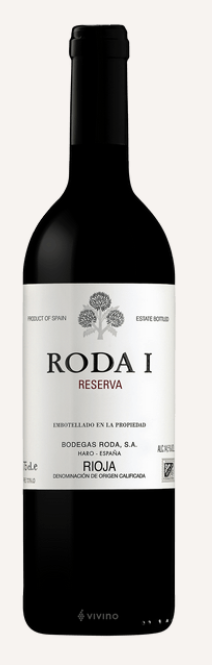

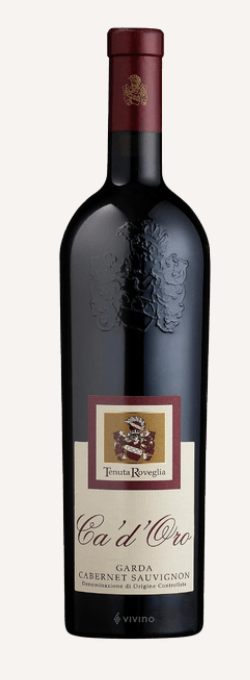

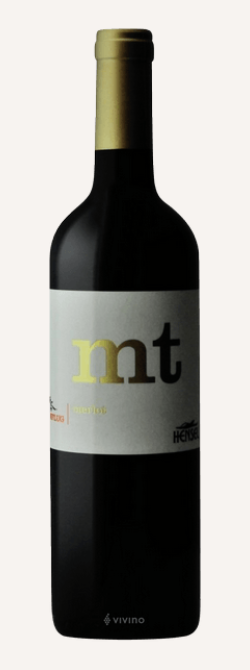